# Explore here

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"

df = pd.read_csv(url, sep =',')
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [268]:
df.shape

(3140, 108)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [270]:
df.select_dtypes(object)

,COUNTY_NAME,STATE_NAME
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama
3,Bibb,Alabama
4,Blount,Alabama
...,...,...
3135,Sweetwater,Wyoming
3136,Teton,Wyoming
3137,Uinta,Wyoming
3138,Washakie,Wyoming


In [271]:
df['COUNTY_NAME'] = pd.factorize(df['COUNTY_NAME'])[0]
df['STATE_NAME'] = pd.factorize(df['STATE_NAME'])[0]

In [272]:
df.duplicated().sum()

np.int64(0)

In [273]:
from sklearn.model_selection import train_test_split

X = df.drop('Heart disease_number', axis = 1)
y = df['Heart disease_number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

X_train.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1113,22005,124672,18100,14.518095,18206,14.603119,15468,12.406956,18382,14.744289,...,6812,11.2,10.4,11.9,10228,2.7,2.6,2.9,2486,3
1551,29141,20358,2548,12.515964,2510,12.329305,2006,9.853620,2013,9.888005,...,2118,15.5,14.1,16.8,2431,4.2,3.8,4.5,652,6
2423,46129,5587,727,13.012350,726,12.994451,569,10.184357,596,10.667621,...,287,11.5,10.5,12.5,490,3.4,3.1,3.7,145,6
2578,48115,12619,1782,14.121563,1801,14.272129,2006,15.896664,1770,14.026468,...,825,16.2,15.3,17.0,1522,3.9,3.7,4.2,369,5
1675,31047,23709,3586,15.125058,3441,14.513476,2947,12.429879,2902,12.240078,...,1264,12.5,11.6,13.3,2154,3.2,3.0,3.5,559,5


In [274]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_norm = scaler.fit_transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

X_test_norm = scaler.fit_transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

X_train_norm.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1113,0.381563,0.012328,0.014980,0.581119,0.014692,0.626626,0.009934,0.358052,0.012232,0.536283,...,0.015677,0.265625,0.263441,0.262626,0.010728,0.186047,0.200,0.195652,0.010443,0.4
1551,0.511210,0.002006,0.002109,0.500980,0.002026,0.529055,0.001288,0.284366,0.001333,0.235255,...,0.004863,0.489583,0.462366,0.510101,0.002541,0.534884,0.500,0.543478,0.002730,1.0
2423,0.819847,0.000544,0.000602,0.520849,0.000586,0.557597,0.000365,0.293910,0.000390,0.283581,...,0.000645,0.281250,0.268817,0.292929,0.000503,0.348837,0.325,0.369565,0.000597,1.0
2578,0.855928,0.001240,0.001475,0.565247,0.001453,0.612423,0.001288,0.458762,0.001171,0.491787,...,0.001884,0.526042,0.526882,0.520202,0.001587,0.465116,0.475,0.478261,0.001539,0.8
1675,0.545838,0.002337,0.002968,0.605414,0.002777,0.622779,0.001893,0.358714,0.001925,0.381054,...,0.002896,0.333333,0.327957,0.333333,0.002250,0.302326,0.300,0.326087,0.002338,0.8


In [275]:
from sklearn.feature_selection import f_regression, SelectKBest

selection_model = SelectKBest(score_func = f_regression, k = 30)

selection_model.fit(X_train_norm, y_train)

X_train_norm = pd.DataFrame(selection_model.transform(X_train_norm), columns=X_train_norm.columns.values[selection_model.get_support()])
X_test_norm = pd.DataFrame(selection_model.transform(X_test_norm), columns=X_test_norm.columns.values[selection_model.get_support()])

X_train_norm.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,0.012328,0.014980,0.014692,0.009934,0.012232,0.012476,0.012350,0.011928,0.011666,0.007640,...,0.012340,0.013345,0.011781,0.010387,0.011522,0.014501,0.014785,0.015677,0.010728,0.010443
1,0.002006,0.002109,0.002026,0.001288,0.001333,0.001485,0.002168,0.003074,0.003864,0.003006,...,0.002334,0.002397,0.001981,0.003422,0.001972,0.002821,0.002697,0.004863,0.002541,0.002730
2,0.000544,0.000602,0.000586,0.000365,0.000390,0.000416,0.000507,0.000763,0.000884,0.001184,...,0.000875,0.000397,0.000537,0.000920,0.000527,0.000656,0.000620,0.000645,0.000503,0.000597
3,0.001240,0.001475,0.001453,0.001288,0.001171,0.001010,0.001022,0.001163,0.001460,0.001409,...,0.001081,0.000985,0.001288,0.001379,0.001175,0.001725,0.001832,0.001884,0.001587,0.001539
4,0.002337,0.002968,0.002777,0.001893,0.001925,0.002020,0.002046,0.002663,0.002896,0.002894,...,0.003980,0.002239,0.002360,0.002653,0.002169,0.002826,0.003073,0.002896,0.002250,0.002338


In [276]:
X_train_norm.columns

Index(['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'White-alone pop', 'POP_ESTIMATE_2018',
       'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18',
       'Bachelor's degree or higher 2014-18', 'POVALL_2018',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Total nurse practitioners (2019)',
       'Family Medicine/General Practice Primary Care (2019)',
       'Total Specialist Physicians (2019)', 'Total Population',
       'Population Aged 60+', 'county_pop2018_18 and older',
       'anycondition_number', 'Obesity_number', 'COPD_number',
       'diabetes_number', 'CKD_number'],
      dtype='object')

In [277]:
X_train_norm.drop(columns=[
         'White-alone pop',
         'POP_ESTIMATE_2018',
         'High school diploma only 2014-18',
         "Some college or associate's degree 2014-18",
         "Bachelor's degree or higher 2014-18",
         'POVALL_2018',
         'Employed_2018',
         'Unemployed_2018',
         'Total Population',
         'county_pop2018_18 and older',
         'anycondition_number'
         ], inplace = True)

X_test_norm.drop(columns=[
         'White-alone pop',
         'POP_ESTIMATE_2018',
         'High school diploma only 2014-18',
         "Some college or associate's degree 2014-18",
         "Bachelor's degree or higher 2014-18",
         'POVALL_2018',
         'Employed_2018',
         'Unemployed_2018',
         'Total Population',
         'county_pop2018_18 and older',
         'anycondition_number'
         ], inplace = True)

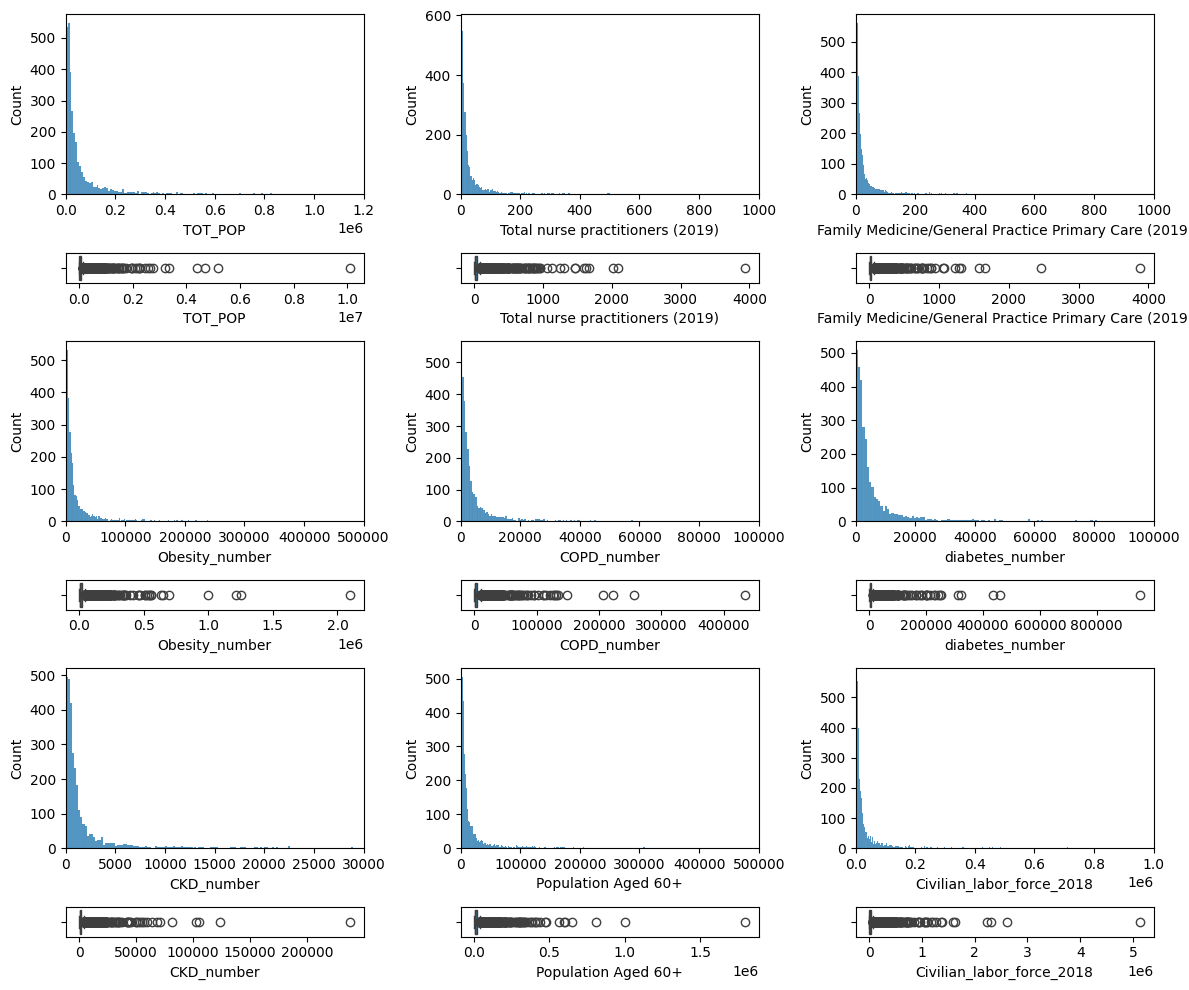

In [278]:
fig, axis = plt.subplots(6, 3, figsize=(12, 10), gridspec_kw = {"height_ratios": [6, 1, 6, 1, 6, 1]})

sns.histplot(ax = axis[0,0], data = df, x = "TOT_POP").set_xlim(0,1200000)
sns.boxplot(ax = axis[1, 0], data = df, x = "TOT_POP")

sns.histplot(ax = axis[0,1], data = df, x = "Total nurse practitioners (2019)").set_xlim(0,1000)
sns.boxplot(ax = axis[1, 1], data = df, x = "Total nurse practitioners (2019)")

sns.histplot(ax = axis[0,2], data = df, x = "Family Medicine/General Practice Primary Care (2019)").set_xlim(0,1000)
sns.boxplot(ax = axis[1, 2], data = df, x = "Family Medicine/General Practice Primary Care (2019)")

sns.histplot(ax = axis[2,0], data = df, x = "Obesity_number").set_xlim(0,500000)
sns.boxplot(ax = axis[3, 0], data = df, x = "Obesity_number")

sns.histplot(ax = axis[2,1], data = df, x = "COPD_number").set_xlim(0,100000)
sns.boxplot(ax = axis[3, 1], data = df, x = "COPD_number")

sns.histplot(ax = axis[2,2], data = df, x = "diabetes_number").set_xlim(0,100000)
sns.boxplot(ax = axis[3, 2], data = df, x = "diabetes_number")

sns.histplot(ax = axis[4,0], data = df, x = "CKD_number").set_xlim(0,30000)
sns.boxplot(ax = axis[5, 0], data = df, x = "CKD_number")

sns.histplot(ax = axis[4,1], data = df, x = "Population Aged 60+").set_xlim(0,500000)
sns.boxplot(ax = axis[5, 1], data = df, x = "Population Aged 60+")

sns.histplot(ax = axis[4,2], data = df, x = "Civilian_labor_force_2018").set_xlim(0,1000000)
sns.boxplot(ax = axis[5, 2], data = df, x = "Civilian_labor_force_2018")

plt.tight_layout()
plt.show()

/tmp/ipykernel_763/4221341527.py:30: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


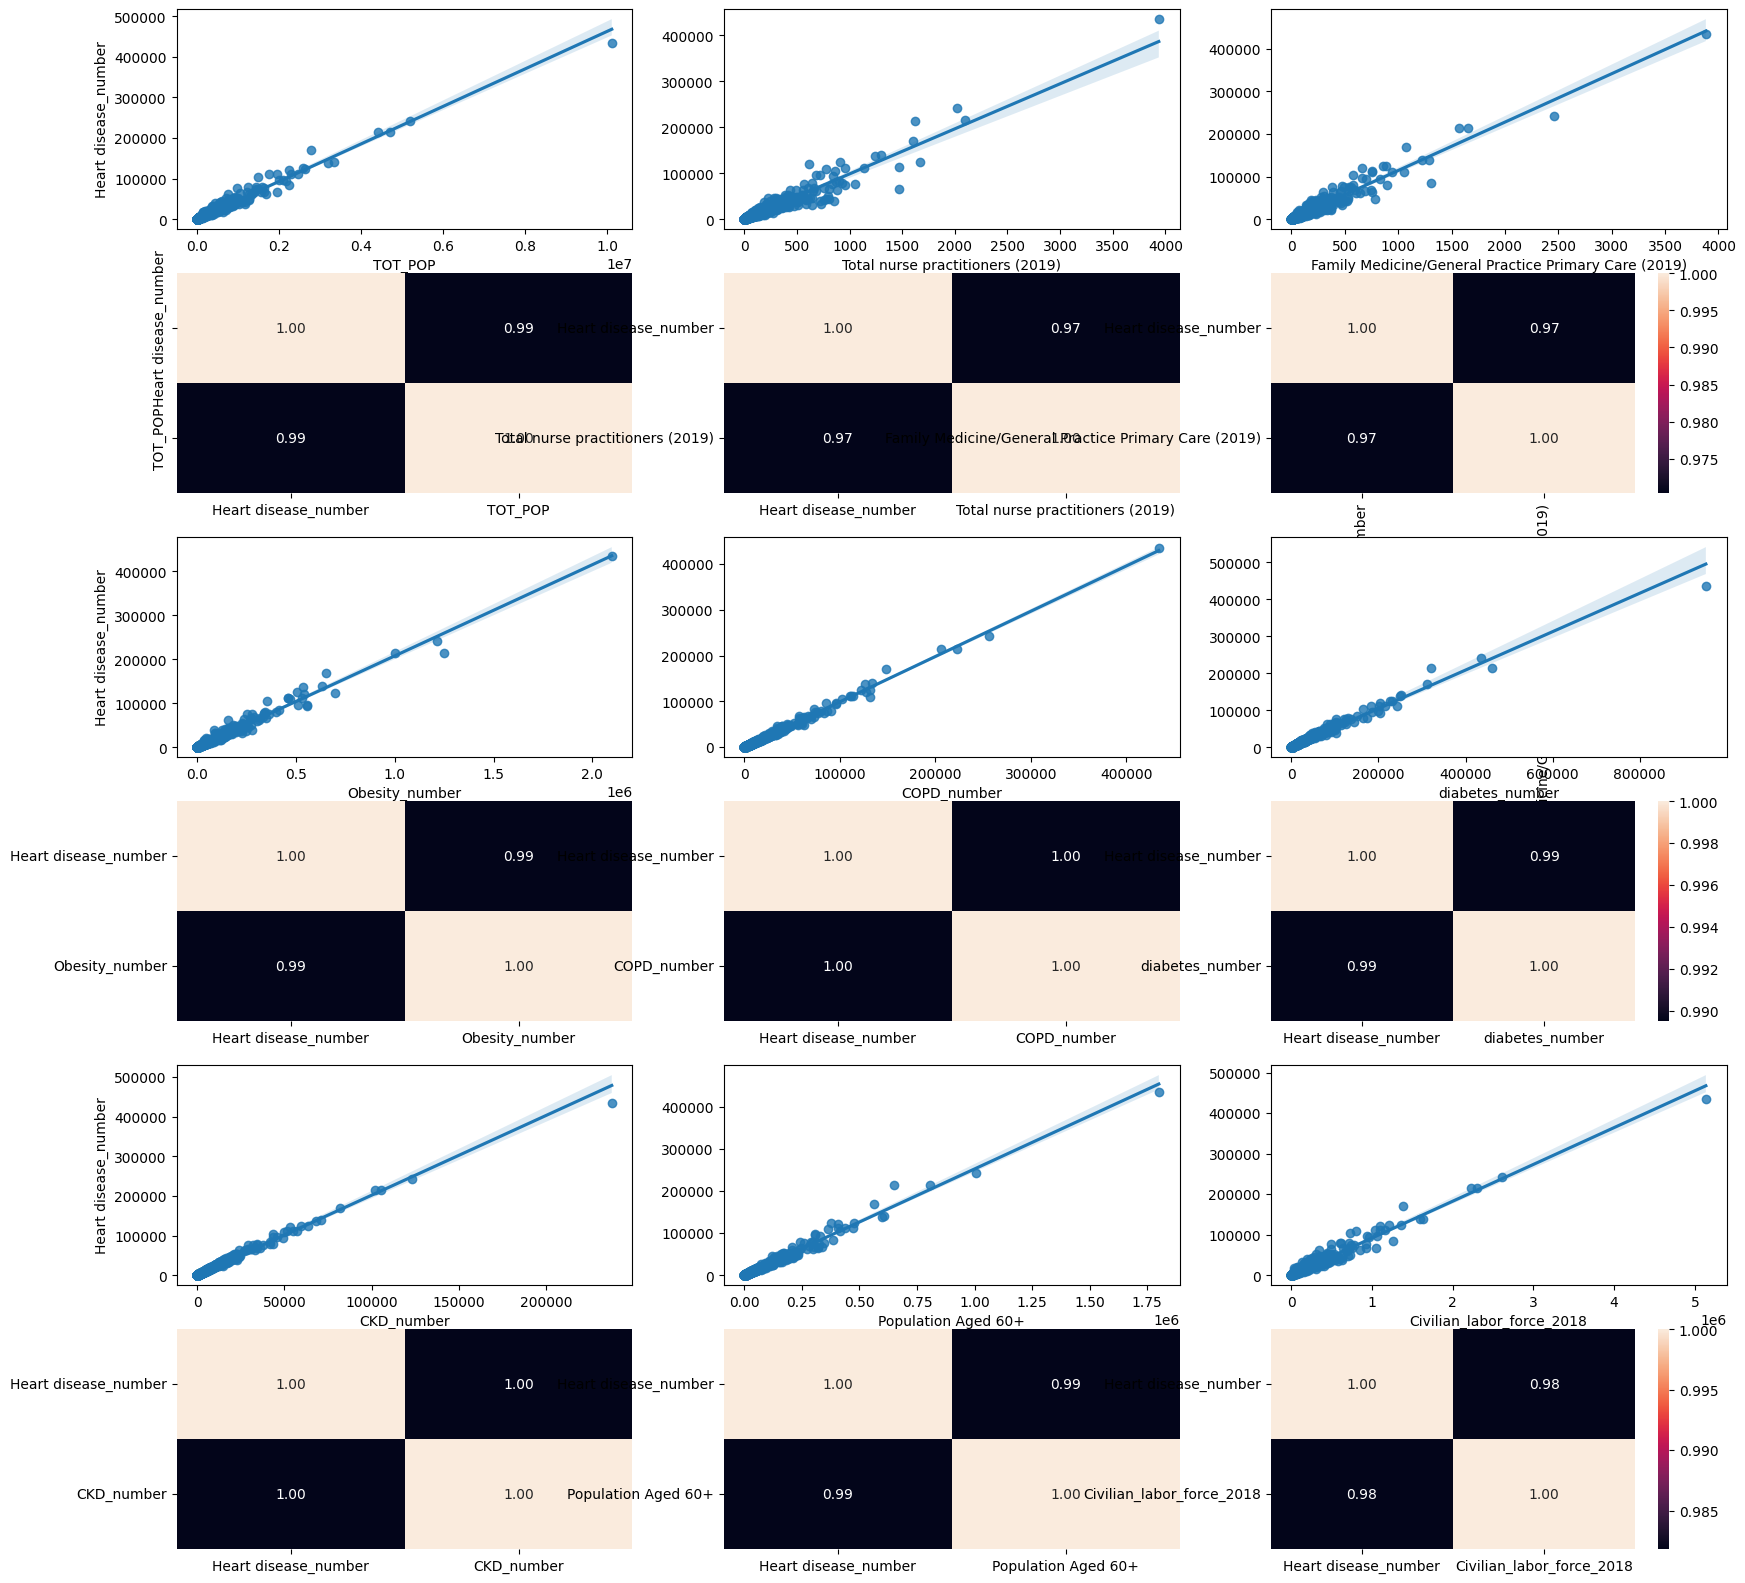

In [279]:
fig, axis = plt.subplots(6, 3, figsize=(20, 20))

sns.regplot(ax = axis[0,0], data = df, x = "TOT_POP", y = "Heart disease_number")
sns.heatmap(df[["Heart disease_number", "TOT_POP"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0,1], data = df, x = "Total nurse practitioners (2019)", y = "Heart disease_number").set(ylabel = None)
sns.heatmap(df[["Heart disease_number", "Total nurse practitioners (2019)"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0,2], data = df, x = "Family Medicine/General Practice Primary Care (2019)", y = "Heart disease_number").set(ylabel = None)
sns.heatmap(df[["Heart disease_number", "Family Medicine/General Practice Primary Care (2019)"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

sns.regplot(ax = axis[2,0], data = df, x = "Obesity_number", y = "Heart disease_number")
sns.heatmap(df[["Heart disease_number", "Obesity_number"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2,1], data = df, x = "COPD_number", y = "Heart disease_number").set(ylabel = None)
sns.heatmap(df[["Heart disease_number", "COPD_number"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(ax = axis[2,2], data = df, x = "diabetes_number", y = "Heart disease_number").set(ylabel = None)
sns.heatmap(df[["Heart disease_number", "diabetes_number"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2])

sns.regplot(ax = axis[4,0], data = df, x = "CKD_number", y = "Heart disease_number")
sns.heatmap(df[["Heart disease_number", "CKD_number"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0], cbar = False)

sns.regplot(ax = axis[4,1], data = df, x = "Population Aged 60+", y = "Heart disease_number").set(ylabel = None)
sns.heatmap(df[["Heart disease_number", "Population Aged 60+"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1], cbar = False)

sns.regplot(ax = axis[4,2], data = df, x = "Civilian_labor_force_2018", y = "Heart disease_number").set(ylabel = None)
sns.heatmap(df[["Heart disease_number", "Civilian_labor_force_2018"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 2])

plt.tight_layout()
plt.show()

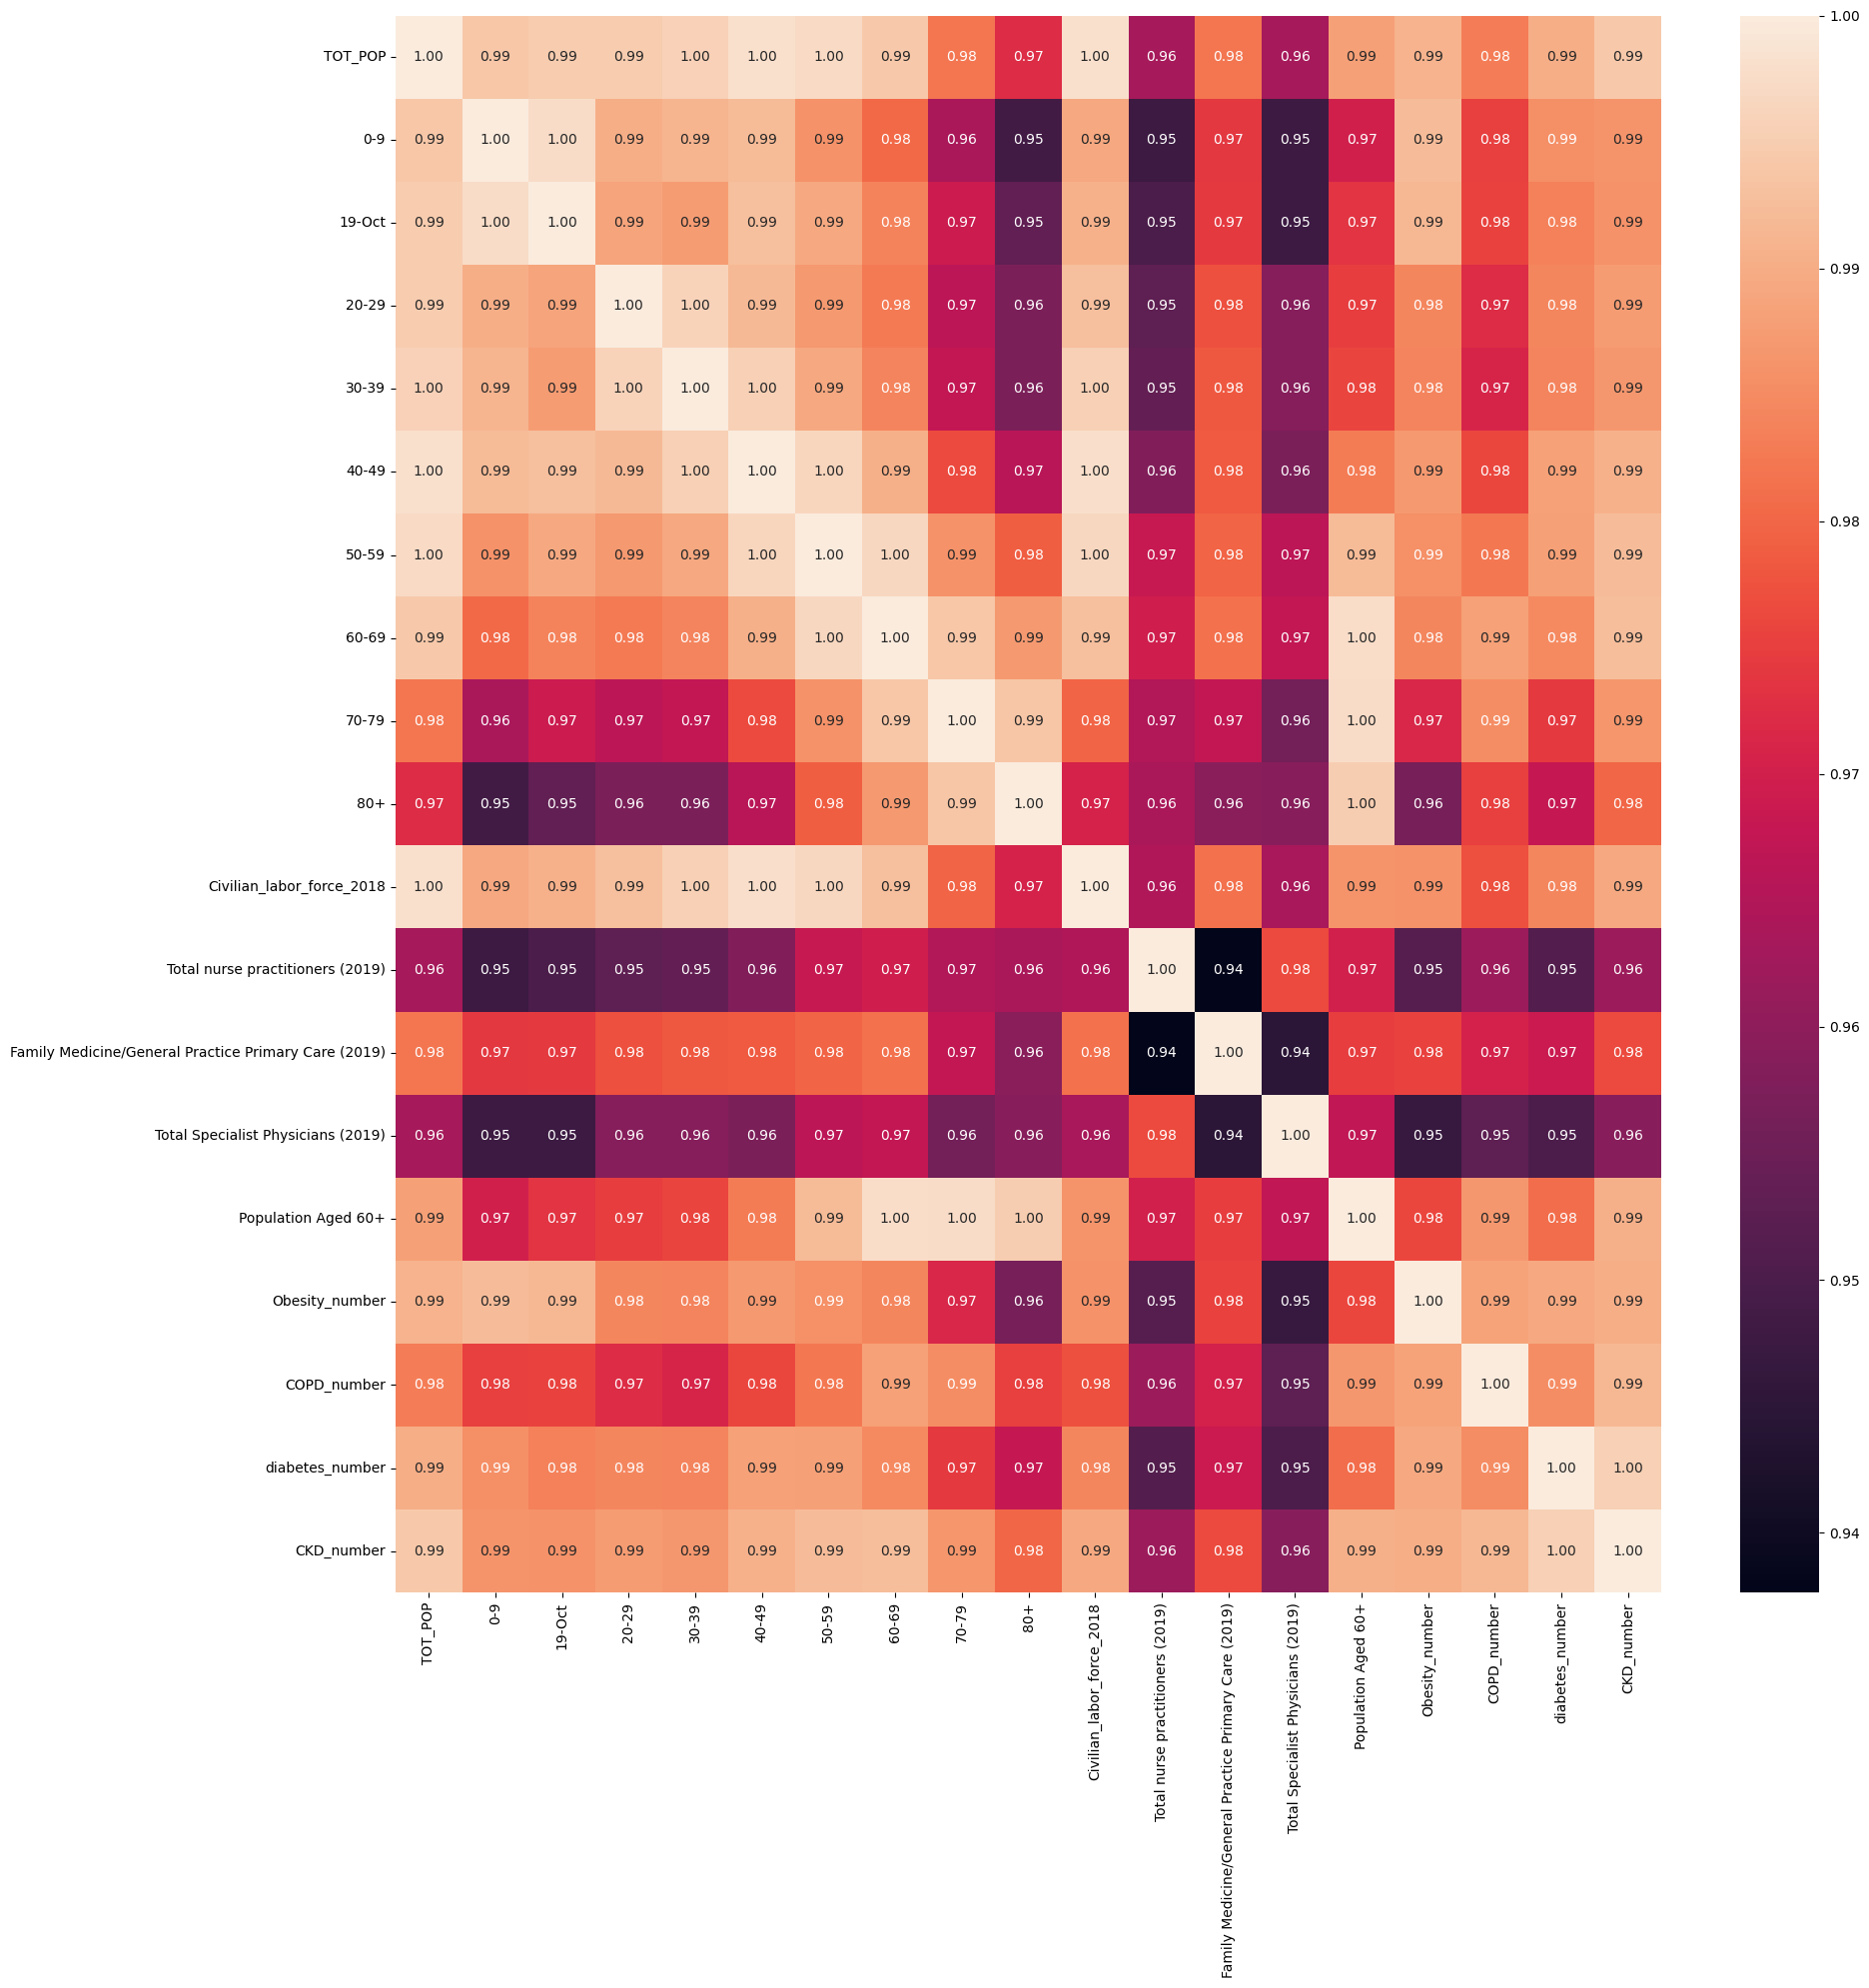

In [280]:
fig, axes = plt.subplots(figsize=(20,20))

sns.heatmap(X_train_norm.corr(),annot=True,fmt=".2f")

plt.tight_layout()
plt.show()

In [281]:
df[X_train_norm.columns].describe()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,Civilian_labor_force_2018,Total nurse practitioners (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Population Aged 60+,Obesity_number,COPD_number,diabetes_number,CKD_number
count,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000
mean,1.041894e+05,1.274030e+04,1.336798e+04,1.446933e+04,1.391649e+04,1.288521e+04,1.363803e+04,1.191621e+04,7220.310510,4035.541720,5.147558e+04,52.698009,44.393892,167.332629,2.132298e+04,2.527613e+04,5827.242357,9326.577707,2466.234076
std,3.335834e+05,4.180730e+04,4.228439e+04,4.957773e+04,4.899095e+04,4.347219e+04,4.272063e+04,3.451858e+04,20287.498429,12063.782251,1.687896e+05,153.878850,133.348667,543.035916,6.140588e+04,7.446684e+04,15720.551934,29754.601185,7730.422067
min,8.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.400000e+01,2.000000e+01,6.000000,0.000000,0.000000e+00,0.025524,0.030356,0.111759,2.700000e+01,2.500000e+01,7.000000,11.000000,3.000000
25%,1.096325e+04,1.280500e+03,1.374500e+03,1.263750e+03,1.232750e+03,1.245250e+03,1.483000e+03,1.476500e+03,950.750000,533.000000,4.921000e+03,5.439135,5.312558,14.740077,2.814750e+03,3.075000e+03,815.000000,1187.750000,314.750000
50%,2.580050e+04,3.057000e+03,3.274000e+03,3.108000e+03,3.000500e+03,3.048500e+03,3.515500e+03,3.410000e+03,2177.000000,1160.000000,1.158300e+04,13.076544,12.153987,36.223582,6.310000e+03,7.182500e+03,1963.500000,2743.000000,718.000000
75%,6.791300e+04,8.097000e+03,8.822250e+03,8.976250e+03,8.314250e+03,8.120500e+03,9.157250e+03,8.710500e+03,5574.000000,2899.750000,3.163700e+04,35.215580,31.312501,103.869345,1.610625e+04,1.854250e+04,4727.000000,6679.250000,1776.250000
max,1.010552e+07,1.208253e+06,1.239139e+06,1.557073e+06,1.501844e+06,1.350076e+06,1.306003e+06,1.014325e+06,572530.000000,356275.000000,5.136341e+06,3937.767709,3882.586846,15014.048660,1.800341e+06,2.097906e+06,434075.000000,952335.000000,237766.000000


In [282]:
Q1 = df['TOT_POP'].quantile(0.25)
Q3 = df['TOT_POP'].quantile(0.75)
TOT_POP_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * TOT_POP_IQR
lower_limit = Q1 - 1.5 * TOT_POP_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(TOT_POP_IQR, 2)}")

Los límites superior e inferior para la búsqueda de valores atipicos son 153337.62 y -74461.38, con un rango intercuartílico de 56949.75


In [283]:
Q1 = df['Family Medicine/General Practice Primary Care (2019)'].quantile(0.25)
Q3 = df['Family Medicine/General Practice Primary Care (2019)'].quantile(0.75)
Fam_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * Fam_IQR
lower_limit = Q1 - 1.5 * Fam_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(Fam_IQR, 2)}")

Los límites superior e inferior para la búsqueda de valores atipicos son 70.31 y -33.69, con un rango intercuartílico de 26.0


In [284]:
Q1 = df['Obesity_number'].quantile(0.25)
Q3 = df['Obesity_number'].quantile(0.75)
Obesity_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * Obesity_IQR
lower_limit = Q1 - 1.5 * Obesity_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(Obesity_IQR, 2)}")

Los límites superior e inferior para la búsqueda de valores atipicos son 41743.75 y -20126.25, con un rango intercuartílico de 15467.5


In [285]:
Q1 = df['COPD_number'].quantile(0.25)
Q3 = df['COPD_number'].quantile(0.75)
COPD_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * COPD_IQR
lower_limit = Q1 - 1.5 * COPD_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(COPD_IQR, 2)}")

Los límites superior e inferior para la búsqueda de valores atipicos son 10595.0 y -5053.0, con un rango intercuartílico de 3912.0


In [286]:
Q1 = df['diabetes_number'].quantile(0.25)
Q3 = df['diabetes_number'].quantile(0.75)
diabetes_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * diabetes_IQR
lower_limit = Q1 - 1.5 * diabetes_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(diabetes_IQR, 2)}")

Los límites superior e inferior para la búsqueda de valores atipicos son 14916.5 y -7049.5, con un rango intercuartílico de 5491.5


In [287]:
Q1 = df['CKD_number'].quantile(0.25)
Q3 = df['CKD_number'].quantile(0.75)
CKD_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * CKD_IQR
lower_limit = Q1 - 1.5 * CKD_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(CKD_IQR, 2)}")

Los límites superior e inferior para la búsqueda de valores atipicos son 3968.5 y -1877.5, con un rango intercuartílico de 1461.5


In [288]:
Q1 = df['Population Aged 60+'].quantile(0.25)
Q3 = df['Population Aged 60+'].quantile(0.75)
pop60_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * pop60_IQR
lower_limit = Q1 - 1.5 * pop60_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(pop60_IQR, 2)}")

Los límites superior e inferior para la búsqueda de valores atipicos son 36043.5 y -17122.5, con un rango intercuartílico de 13291.5


In [289]:
Q1 = df['Civilian_labor_force_2018'].quantile(0.25)
Q3 = df['Civilian_labor_force_2018'].quantile(0.75)
labor_force_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * labor_force_IQR
lower_limit = Q1 - 1.5 * labor_force_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(labor_force_IQR, 2)}")

Los límites superior e inferior para la búsqueda de valores atipicos son 71711.0 y -35153.0, con un rango intercuartílico de 26716.0


In [290]:
X_train = X_train_norm
X_test = X_test_norm

In [291]:
df.drop(df[df['TOT_POP']>100000].index, inplace=True)
df.drop(df[df['Family Medicine/General Practice Primary Care (2019)']>48].index, inplace=True)
df.drop(df[df['Obesity_number']>28000].index, inplace=True)
df.drop(df[df['COPD_number']>7300].index, inplace=True)
df.drop(df[df['diabetes_number']>10300].index, inplace=True)
df.drop(df[df['CKD_number']>2600].index, inplace=True)
df.drop(df[df['Population Aged 60+']>23600].index, inplace=True)
df.drop(df[df['Civilian_labor_force_2018']>112000].index, inplace=True)



In [292]:
valid_idx = df.index

X_train = X_train[X_train.index.isin(valid_idx)]
y_train = y_train[y_train.index.isin(valid_idx)]
X_test = X_test[X_test.index.isin(valid_idx)]
y_test = y_test[y_test.index.isin(valid_idx)]

common_idx_train = X_train.index.intersection(y_train.index)
common_idx_test = X_test.index.intersection(y_test.index)

X_train = X_train.loc[common_idx_train]
y_train = y_train.loc[common_idx_train]
X_test = X_test.loc[common_idx_test]
y_test = y_test.loc[common_idx_test]

In [293]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [294]:
y_pred = model.predict(X_test)
y_pred

array([ 1806.04905171,  1424.75861816,  1613.69642824,  1396.86979441,
        1616.33495392,  1775.22033468,  1583.5520627 ,  1731.59179643,
        1718.96223367,  -953.01194512,  1413.24218765,  1514.67999576,
       -5631.58036825,  1715.31298732,  1562.55602242,  1708.64673081,
        1567.58272044,  1542.7619284 ,  1714.96458034,  1677.218952  ,
         937.97351453,  1165.4395046 ,  1636.18355708,  1669.44831894,
        1569.26384583,  1558.10749517,  1402.54655059,  1459.00891587,
        1849.49136707,  1927.42449782,  1550.9381006 ,  1926.06896783,
        1749.94538626,  1635.50285226,  1536.39508784,  1704.69840996,
        1836.53692436,  1710.78011181,   380.01102676,  1464.66974515,
        1895.41111347,  1708.11807755,   220.90893161,  1268.62814861,
        1463.81286579,  1645.05072777,  1734.35084517,  1867.05731056,
        1750.045148  ,  1675.84443505,  1723.04823398,  1388.31109654,
        1689.331733  ,  1872.79666782,  1700.95165232,  1620.95359375,
      

In [295]:
from sklearn.metrics import mean_squared_error, r2_score

mse_rl = mean_squared_error(y_test, y_pred)
rmse_rl = np.sqrt(mse_rl)
r2_rl = r2_score(y_test, y_pred)

print("MSE: ", mse_rl)
print("RMSE: ", rmse_rl)
print("Coeficiente de determinación: ", r2_rl)

MSE:  3459794.827345394
RMSE:  1860.0523722049854
Coeficiente de determinación:  -2.0031344213108526


In [296]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 0.3, max_iter = 5000)

model.fit(X_train, y_train)

Lasso(alpha=0.3, max_iter=5000)

In [297]:
y_pred = model.predict(X_test)
y_pred

array([1689.74353413, 1882.04847666, 1687.87203101, 1732.82735737,
       1681.54708391, 1678.96635027, 1698.41126436, 1691.03438419,
       1686.13441881, 1817.26994015, 1713.35145394, 1713.33831976,
       1650.23373627, 1681.13935271, 1742.55494597, 1702.03680869,
       1681.67990203, 1686.67535824, 1699.92071322, 1690.61242016,
       1698.97553145, 1679.90998729, 1698.32489295, 1680.88888895,
       1696.20051585, 1688.57806186, 1701.94084709, 1684.72448563,
       1759.37307168, 1701.08198373, 1688.43242784, 1707.1751086 ,
       1689.75249209, 1688.29241654, 1761.332917  , 1693.81068771,
       2135.5070864 , 1697.34205376, 1769.82787064, 1686.40229987,
       1686.25676675, 1690.92487157, 1637.71640016, 1741.66995055,
       1758.12371146, 1692.92742995, 1691.53601876, 1690.41558428,
       1732.67008401, 1688.04864984, 1729.99253178, 1694.08124562,
       1690.35128477, 1717.27807843, 1690.35635843, 1690.69955434,
       1692.26643264, 1687.46306733, 1689.11942619, 1825.23018

In [298]:
mse_l1 = mean_squared_error(y_test, y_pred)
rmse_l1 = np.sqrt(mse_l1)
r2_l1 = r2_score(y_test, y_pred)

print("MSE: ", mse_l1)
print("RMSE: ", rmse_l1)
print("Coeficiente de determinación: ", r2_l1)

MSE:  1282355.1979774171
RMSE:  1132.411231831183
Coeficiente de determinación:  -0.1130963619445915


In [299]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 0.2, max_iter = 4000)

model.fit(X_train, y_train)

Ridge(alpha=0.2, max_iter=4000)

In [300]:
y_pred = model.predict(X_test)
y_pred

array([1692.97287345, 1860.94674672, 1681.00662066, 1733.34149167,
       1676.5852097 , 1666.36042437, 1711.38342675, 1692.0177223 ,
       1688.14146101, 1683.90243724, 1682.22937268, 1716.34703538,
       1282.38796337, 1675.76774588, 1733.37641947, 1695.95512942,
       1681.03606218, 1685.1473166 , 1692.74047248, 1692.74902516,
       1686.45560498, 1661.57583367, 1694.01208627, 1676.75009215,
       1673.8616117 , 1677.33280915, 1694.86356805, 1675.60421597,
       1743.26528444, 1700.6363591 , 1682.5699118 , 1717.15654116,
       1678.57251234, 1686.35924018, 1722.62206837, 1697.36171612,
       1760.92391077, 1691.86349953, 1687.80836727, 1684.10363142,
       1662.55879008, 1695.58602933, 1768.91899618, 1754.05200257,
       1755.26741283, 1698.91442062, 1694.11611144, 1694.16554234,
       1714.36882419, 1691.27968704, 1736.79338472, 1677.44401039,
       1694.19786928, 1713.0247173 , 1694.87696459, 1689.08914754,
       1690.66863727, 1680.30242001, 1682.09114265, 1816.01555

In [301]:
mse_l2 = mean_squared_error(y_test, y_pred)
rmse_l2 = np.sqrt(mse_l2)
r2_l2 = r2_score(y_test, y_pred)

print("MSE: ", mse_l2)
print("RMSE: ", rmse_l2)
print("Coeficiente de determinación: ", r2_l2)

MSE:  1286626.9388396826
RMSE:  1134.2957898360032
Coeficiente de determinación:  -0.11680427315394848


In [302]:
data = {
    'Modelo': ['Regresión lineal', "Regulación Lasso", "Regulación Ridge"],
    'MSE': [mse_rl, mse_l1, mse_l2],
    'RMSE': [rmse_rl, rmse_l1, rmse_l2],
    'R²': [r2_rl, r2_l1, r2_l2]
}

resultados = pd.DataFrame(data)

print(resultados)

             Modelo           MSE         RMSE        R²
0  Regresión lineal  3.459795e+06  1860.052372 -2.003134
1  Regulación Lasso  1.282355e+06  1132.411232 -0.113096
2  Regulación Ridge  1.286627e+06  1134.295790 -0.116804
